In [1]:
import os
from vp_analysis_api import VPAnalysisAPI

# generate and download api key file from https://portal.variantperception.com/vp-data-api
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment
API Key: eyJhb...


To retrieve **first release** data, add a **"[0]"** postfix to the ticker when calling get_series() function:

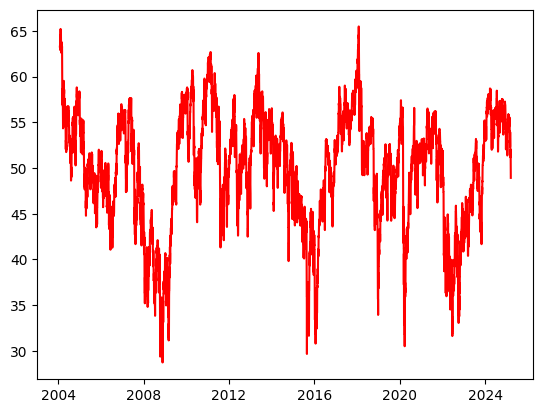

In [2]:
# Get first release tactical Fast Money data for S&P 500
import matplotlib.pyplot as plt

data = api.get_series(["spx_vp_fast_money[0]"])
data = api.clean_df(data, freq="D", start_date=None)

plt.plot(data["spx_vp_fast_money[0]"], color="red")

To retrieve **revised data**, simply call get_series() with the ticker without the postfix:

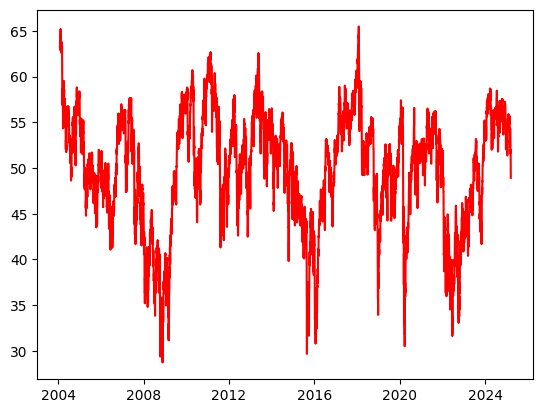

In [3]:
# Get revised tactical Fast Money data for S&P 500
import matplotlib.pyplot as plt

data = api.get_series(["spx_vp_fast_money"])
data = api.clean_df(data, freq="D", start_date=None)

plt.plot(data["spx_vp_fast_money"], color="red")

You can also combine **first release** and **revised** data in a single request:

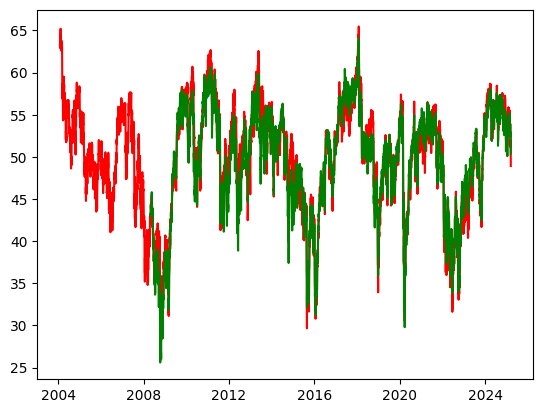

In [4]:
# Get first release data for S&P 500 and revised data for ACWI
import matplotlib.pyplot as plt

data = api.get_series(["spx_vp_fast_money[0]", "acwi_vp_fast_money"])
data = api.clean_df(data, freq="D", start_date=None)

plt.plot(data["spx_vp_fast_money[0]"], color="red")
plt.plot(data["acwi_vp_fast_money"], color="green")